<a href="https://colab.research.google.com/github/martinmedice/Learning_Data_Science/blob/main/Classificacao__DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Projeto de classificação

Uma empresa especialista de agricultura tem muitos dados de agronomia sobre as características de bom crescimento de diversas culturas e gostaria de saber se é possível sugerir culturas para clientes com base nas características do solo e de clima.

Sabendo disso os engenheiros dessa empresa te enviaram um dataset com as seguintes informações:
* N - % de nitrogênio contido no solo
* P - % of fósforo contido no solo
* K - % of potásso contido no solo
* temperature - Temperatura do local
* humidity - Umidade relativa
* ph - Ph do solo
* rainfall - Quantidade de chuva por mês em mm

Sabendo dessas informações, essa empresa quer saber se você consegue sugerir culturas para a [Caatinga](https://www.embrapa.br/agencia-de-informacao-tecnologica/tematicas/bioma-caatinga) baseado somente nas informações de temperatura máxima no período, umidade relativa e quantidade de chuva no maior período de precipitação?
Outra informação que eles necessitam são características propícias para plantação de café como faixas de temperatura e ph por exemplo.



## Import do dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DEX/Crop_recommendation.csv")

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.shape

(2200, 8)

## EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,5)

In [ ]:
len(df["label"].unique())

22

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

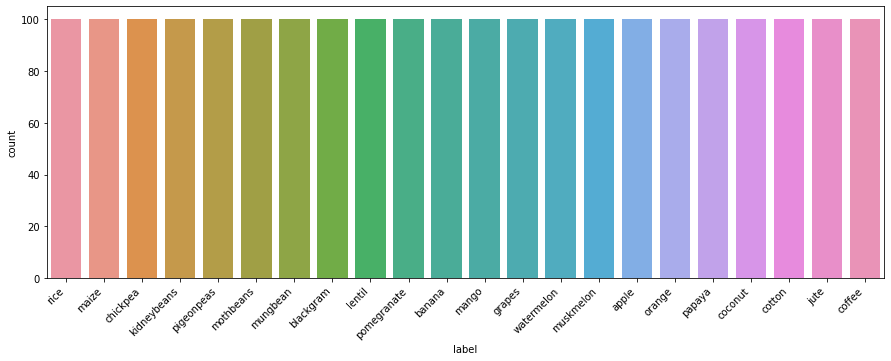

In [ ]:
sns.countplot(df["label"])
plt.xticks(rotation=45, ha='right')

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

>>>>>>N


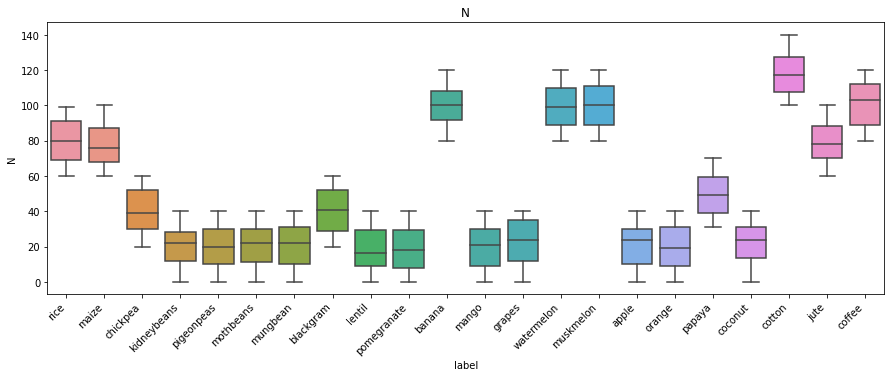

>>>>>>P


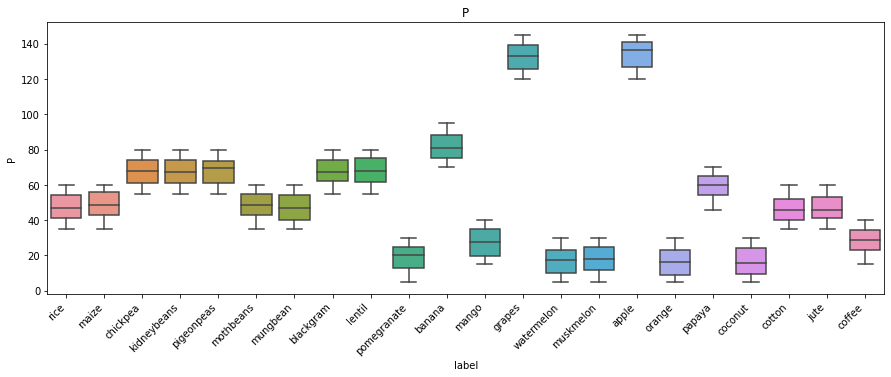

>>>>>>K


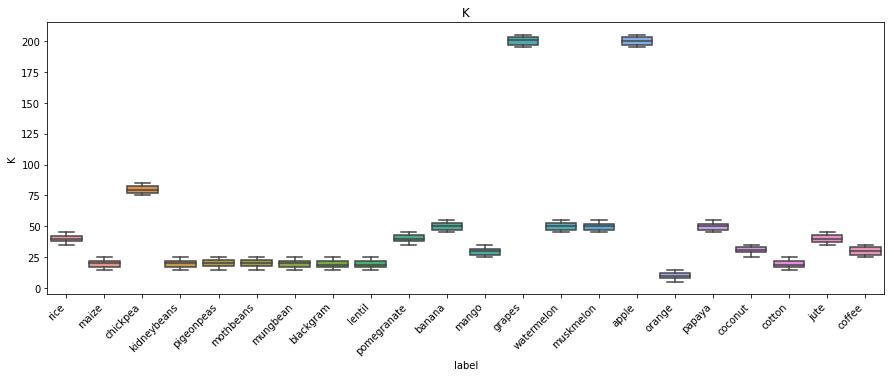

>>>>>>temperature


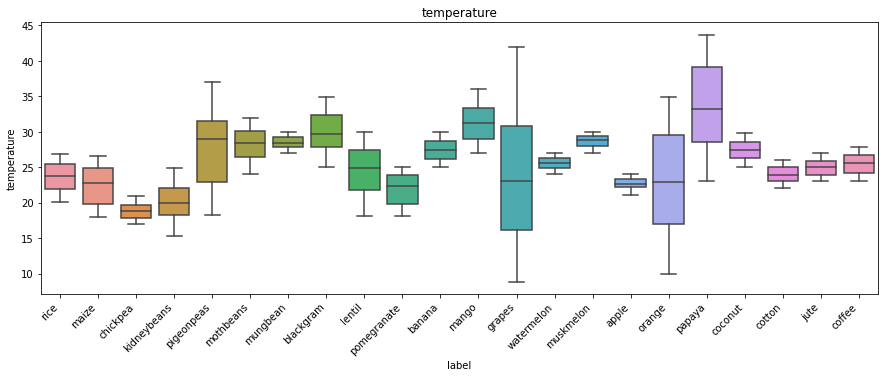

>>>>>>humidity


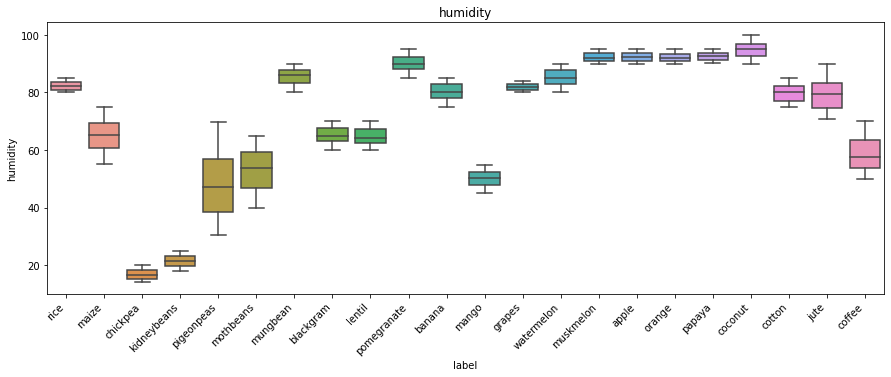

>>>>>>ph


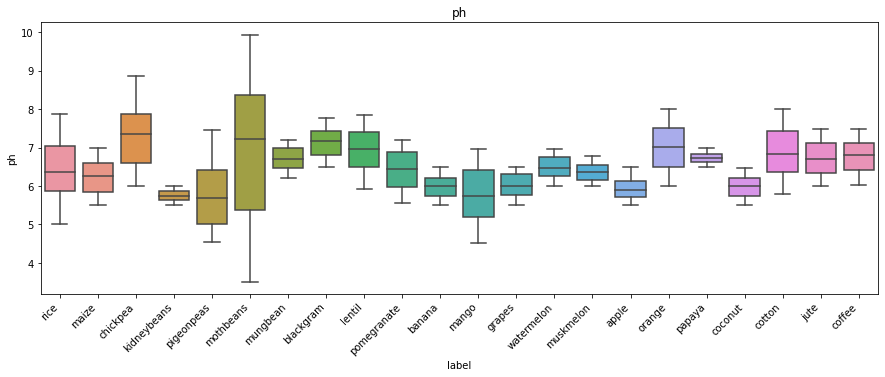

>>>>>>rainfall


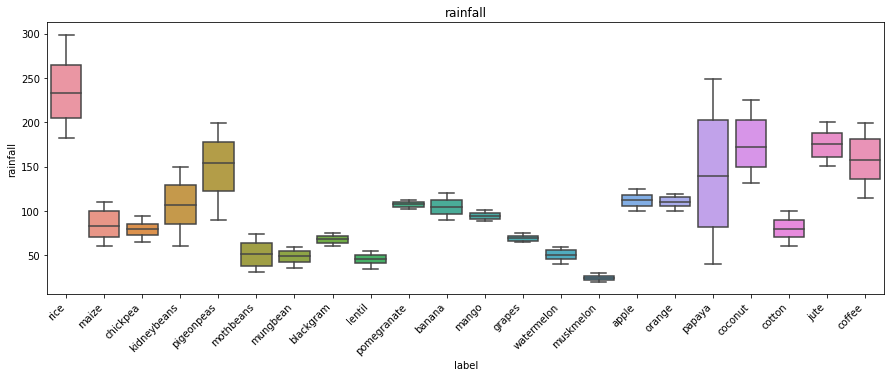

In [ ]:
to_plot = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for feature in to_plot:
  print(f">>>>>>{feature}")
  sns.boxplot(data=df, x='label', y=feature)
  plt.xticks(rotation=45, ha='right')
  plt.title(feature)
  plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='humidity', y='rainfall', z='temperature', color='label')
fig.show()

In [ ]:
corre = df.corr()

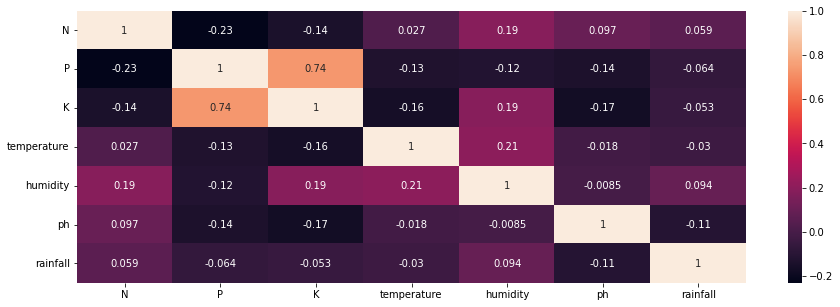

In [ ]:
sns.heatmap(corre, annot=True)

## Model

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
X_features = df.drop(columns=['label'])
y_target = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=7)

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1760, 7)
X_test shape: (440, 7)
y_train shape: (1760,)
y_test shape: (440,)


### Scaler

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [ ]:
pd.DataFrame(x_train_scaled, columns=X_train.columns)

,N,P,K,temperature,humidity,ph,rainfall
0,0.150000,0.278571,0.065,0.523487,0.847387,0.563541,0.108761
1,0.257143,0.171429,0.040,0.340208,0.894233,0.672555,0.321866
2,0.807143,0.100000,0.205,0.476128,0.779984,0.432580,0.105366
3,0.642857,0.078571,0.200,0.461846,0.774108,0.433381,0.109083
4,0.085714,0.107143,0.170,0.316675,0.839199,0.392242,0.326433
...,...,...,...,...,...,...,...
1755,0.307143,0.435714,0.370,0.305214,0.011284,0.695431,0.195457
1756,0.050000,0.078571,0.020,0.288492,0.907391,0.670130,0.339532
1757,0.121429,0.371429,0.075,0.564741,0.360960,0.044916,0.165228
1758,0.278571,1.000000,0.980,0.800739,0.773779,0.353146,0.187034


## Algoritmos

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = model_knn.predict(x_test_scaled)

In [ ]:
print("Acc Teste: ", accuracy_score(y_test, y_pred)*100)
print("F1 Teste: ", f1_score(y_test, y_pred, average='weighted')*100)

Acc Teste:  97.95454545454545
F1 Teste:  97.9578334437357


In [ ]:
## Random Forest

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=50)
model_rf.fit(x_train_scaled, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = model_rf.predict(x_test_scaled)

In [ ]:
print("Acc Teste: ", accuracy_score(y_test, y_pred)*100)
print("F1 Teste: ", f1_score(y_test, y_pred, average='weighted')*100)

Acc Teste:  99.31818181818181
F1 Teste:  99.31863432734512


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

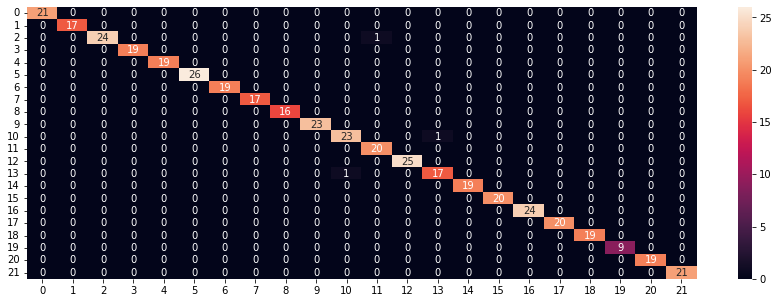

In [ ]:
sns.heatmap(cm, annot=True)

## Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
        'n_estimators': [20, 50, 200, 250],
          'max_depth':[None, 3, 5],
          'criterion':['gini', 'entropy'],
          'min_samples_split':[2, 5, 10]
          }

In [ ]:
clf = RandomForestClassifier()

clf_gs = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1, verbose=2)
clf_gs.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 200, 250]},
             verbose=2)

In [ ]:
best_rf = clf_gs.best_estimator_

In [ ]:
y_pred = best_rf.predict(x_test_scaled)

In [ ]:
print("Acc Teste: ", accuracy_score(y_test, y_pred)*100)
print("F1 Teste: ", f1_score(y_test, y_pred, average='weighted')*100)

Acc Teste:  99.54545454545455
F1 Teste:  99.54656051271813


## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [ ]:
pipe = Pipeline(steps=[('scaler', MinMaxScaler()),
                       ('clf', KNeighborsClassifier())])

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=7)

results = cross_validate(estimator=pipe, X=X_train, y=y_train, cv=kfold, n_jobs=-1)


In [ ]:
model_pipe = pipe.fit(X_train, y_train)
y_pred = model_pipe.predict(X_test)

In [ ]:
print("Acc Teste: ", accuracy_score(y_test, y_pred)*100)
print("F1 Teste: ", f1_score(y_test, y_pred, average='weighted')*100)

Acc Teste:  99.54545454545455
F1 Teste:  99.54545454545455


In [ ]:
results['test_score'].mean()

0.9772727272727273

In [ ]:
results

{'fit_time': array([0.01353693, 0.01234984, 0.00916076, 0.00780678, 0.00768304]),
 'score_time': array([0.02185655, 0.01740193, 0.02051091, 0.01737237, 0.01034427]),
 'test_score': array([0.96306818, 0.99431818, 0.97727273, 0.98295455, 0.96875   ])}

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 27.0 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=e29f1264870af49bcac7ba2d33eae18feffbd942f8776ed18a6ae0d33ae2a9f8
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
label = list(df["label"].unique())

In [ ]:
import lime.lime_tabular

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                                                  feature_names=X_train.columns,
                                                   class_names=label,
                                                   mode='classification')

In [ ]:
example = X_test.iloc[25]
example

N              50.000000
P              64.000000
K              25.000000
temperature    28.840792
humidity       63.372307
ph              6.734447
rainfall       70.254967
Name: 744, dtype: float64

In [ ]:
exp = explainer.explain_instance(X_test.iloc[25],
                                   best_rf.predict_proba,
                                   num_features=6,
                                   top_labels=1)

In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:

!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=752fcca91c9a50e3bfa090da65683c01c42d2f3b3c647566ef5f332263343e29
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import *

In [ ]:

model_dt = DecisionTreeClassifier()

In [ ]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
X_train.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [ ]:
type(label)

list

In [ ]:
X_train.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [ ]:
x_train_scaled.shape

(1760, 7)

In [ ]:
y_train.shape

(1760,)

In [ ]:
len(list(X_train.columns))

7

In [ ]:
label

['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

In [ ]:
small_fet = ['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean']

In [ ]:
df_small = df[df["label"].isin(small_fet)]
df_small.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
X_features = df_small.drop(columns=["label"])
y_target = df_small['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=7)

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
X_train.values

array([[ 35.        ,  69.        ,  23.        , ...,  24.96881755,
          5.57841021,  75.45328039],
       [ 19.        ,  65.        ,  25.        , ...,  18.29318436,
          5.62509645, 144.7902323 ],
       [ 84.        ,  57.        ,  25.        , ...,  67.99257471,
          6.48904037,  64.40866039],
       ...,
       [ 17.        ,  57.        ,  20.        , ...,  45.20094476,
          3.79357518,  66.1761456 ],
       [ 67.        ,  35.        ,  22.        , ...,  63.24648023,
          6.38568421, 108.7603001 ],
       [ 77.        ,  52.        ,  17.        , ...,  65.7420046 ,
          5.71479972,  75.82270467]])

In [ ]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()
y_train_2 = lencoder.fit_transform(y_train)

In [ ]:
X_train.values.shape

(560, 7)

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train_2)

DecisionTreeClassifier()

In [ ]:
viz = dtreeviz(model_dt, 
               X_train.values, 
               y_train_2,
               target_name='label',
               feature_names=list(X_train.columns), 
               class_names=small_fet
            )  


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



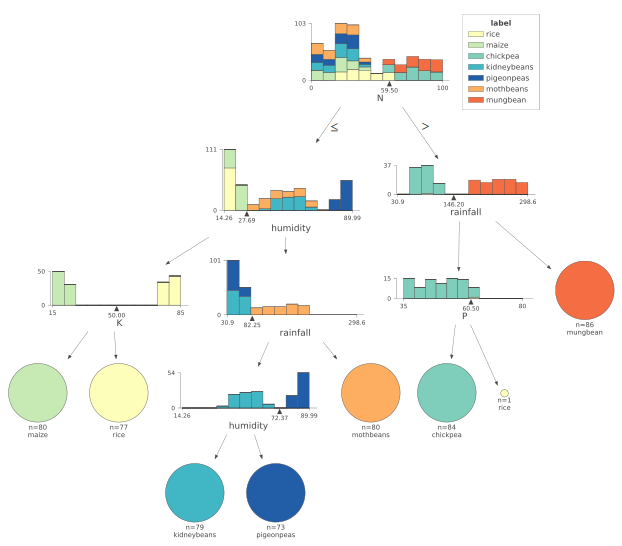

In [ ]:
viz           